In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot
from astropy.io import fits

import auxil_ML as aux

In [16]:
def index(E):
    def f(index, beta, ln_E0):
        return index + 2 * beta * (np.log(E) - ln_E0)
    return f

def weighted_mean_std(vals, weights):
    ws = weights / np.sum(weights)
    mean = np.sum(ws * vals)
    var = np.sum(ws**2 * (vals - mean)**2)
    return mean, np.sqrt(var)

In [4]:
# variables and filenames
folder = '../data/'
plots_folder = '../plots/'
save_plots = False

if not os.path.isdir(plots_folder):
    os.mkdir(plots_folder)

cat = '4FGL-DR2' # '4FGL-DR2' or '3FGL'
nclasses = 3
cat_name = '%s_prob_catalog_%iclasses' % (cat, nclasses)

descr_str = '%s_%iclasses' % (cat, nclasses) # description for output



In [5]:
# load prob catalog
cat_fn = '%s%s.csv' % (folder, cat_name)
pcat = pd.read_csv(cat_fn, index_col=0)


In [6]:
# Get SGUs from the Fermi LAT catalogs

In [7]:
cat_fn

'../data/4FGL-DR2_prob_catalog_3classes.csv'

In [8]:
pcat.columns

Index(['cos(GLON)', 'GLAT', 'ln(Energy_Flux100)', 'ln(Unc_Energy_Flux100)',
       'ln(Pivot_Energy)', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'LP_SigCurv',
       'ln(Variability_Index)', 'HR12', 'HR23', 'HR34', 'HR45', 'HR56', 'HR67',
       'Category_4FGL', 'CLASS_4FGL', 'ASSOC_FGL', 'ASSOC1', 'Flags_4FGL',
       'AGN_BDT', 'AGN_BDT_STD', 'PSR_BDT', 'PSR_BDT_STD', 'OTHER_BDT',
       'OTHER_BDT_STD', 'AGN_NN', 'AGN_NN_STD', 'PSR_NN', 'PSR_NN_STD',
       'OTHER_NN', 'OTHER_NN_STD', 'AGN_RF', 'AGN_RF_STD', 'PSR_RF',
       'PSR_RF_STD', 'OTHER_RF', 'OTHER_RF_STD', 'AGN_LR', 'AGN_LR_STD',
       'PSR_LR', 'PSR_LR_STD', 'OTHER_LR', 'OTHER_LR_STD', 'AGN_BDT_O',
       'AGN_BDT_STD_O', 'PSR_BDT_O', 'PSR_BDT_STD_O', 'OTHER_BDT_O',
       'OTHER_BDT_STD_O', 'AGN_NN_O', 'AGN_NN_STD_O', 'PSR_NN_O',
       'PSR_NN_STD_O', 'OTHER_NN_O', 'OTHER_NN_STD_O', 'AGN_RF_O',
       'AGN_RF_STD_O', 'PSR_RF_O', 'PSR_RF_STD_O', 'OTHER_RF_O',
       'OTHER_RF_STD_O', 'AGN_LR_O', 'AGN_LR_STD_O', 'PSR_LR_O',

In [9]:
set(pcat['Category_Prob'])

{'AGN', 'MIXED', 'OTHER', 'PSR'}

In [10]:
# select masks for different categories of associated and unassociated sources
masks_unas = {}
masks = {}
cats = ['OTHER', 'PSR', 'AGN']
for key in cats:
    masks[key] = (pcat['Category_4FGL'] == key)
for key in cats:
    masks_unas[key] = (pcat['Category_Prob'] == key) & (pcat['Category_4FGL'] == 'UNAS')
unas_mask = pcat['Category_4FGL'] == 'UNAS'

Text(0.5, 1.0, 'Unas probabilities LR')

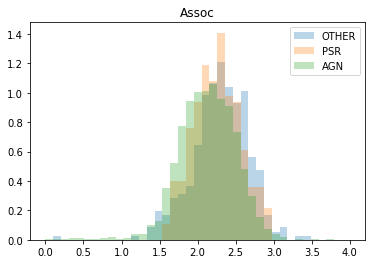

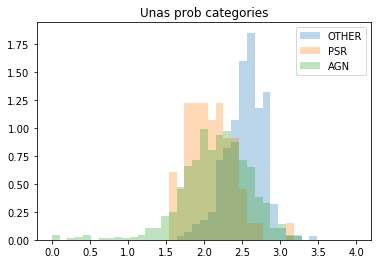

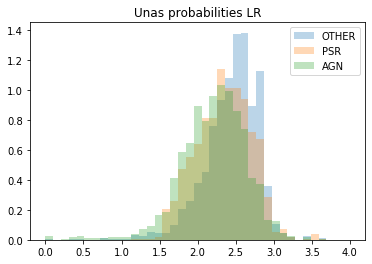

In [11]:
bins = np.linspace(0, 4, 40)
var_name = 'LP_Index'
pyplot.figure()
for key in cats:
    vals = pcat[var_name][masks[key]]
    pyplot.hist(vals, alpha=0.3, label=key, density=True, bins=bins)
pyplot.legend()
pyplot.title('Assoc')

pyplot.figure()
for key in cats:
    vals = pcat[var_name][masks_unas[key]]
    pyplot.hist(vals, alpha=0.3, label=key, density=True, bins=bins)
pyplot.title('Unas prob categories')
pyplot.legend()

# plot probabilistic histogram
pyplot.figure()
alg = 'LR'
for key in cats:
    weight_key = '%s_%s' % (key, alg)
    vals = pcat[var_name][unas_mask]
    weights = pcat[weight_key][unas_mask]
    #print(weight_key, weights[:10])
    pyplot.hist(vals, weights=weights, alpha=0.3, label=key, density=True, bins=bins)
pyplot.legend()
pyplot.title('Unas probabilities %s' % alg)

Text(0.5, 1.0, 'Unas probabilities LR')

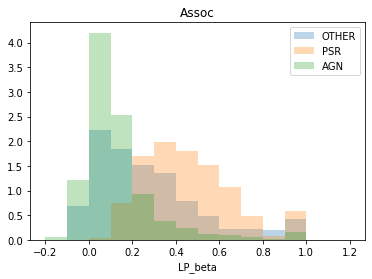

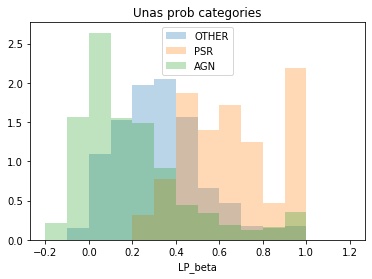

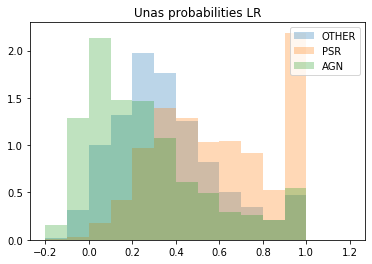

In [12]:
bins = np.arange(-0.2, 1.21, 0.1)
var_name = 'LP_beta'
pyplot.figure()
for key in cats:
    vals = pcat[var_name][masks[key]]
    pyplot.hist(vals, alpha=0.3, label=key, density=True, bins=bins)
pyplot.legend()
pyplot.xlabel(var_name)
pyplot.title('Assoc')
if save_plots:
    fn = plots_folder + '%s_%s_assoc.pdf' % (descr_str, var_name)
    print('Save figure to file:')
    print(fn)
    pyplot.savefig(fn)

pyplot.figure()
for key in cats:
    vals = pcat[var_name][masks_unas[key]]
    pyplot.hist(vals, alpha=0.3, label=key, density=True, bins=bins)
pyplot.legend()
pyplot.xlabel(var_name)
pyplot.title('Unas prob categories')
if save_plots:
    fn = plots_folder + '%s_%s_unas.pdf' % (descr_str, var_name)
    print('Save figure to file:')
    print(fn)
    pyplot.savefig(fn)

    
# plot probabilistic histogram
pyplot.figure()
alg = 'LR'
for key in cats:
    weight_key = '%s_%s' % (key, alg)
    vals = pcat[var_name][unas_mask]
    weights = pcat[weight_key][unas_mask]
    #print(weight_key, weights[:10])
    pyplot.hist(vals, weights=weights, alpha=0.3, label=key, density=True, bins=bins)
pyplot.legend()
pyplot.title('Unas probabilities %s' % alg)

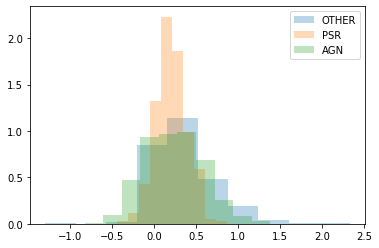

In [13]:
pyplot.figure()
for key in cats:
    vals = pcat['ln(Pivot_Energy)'][masks[key]]/np.log(10) - 3.
    pyplot.hist(vals, alpha=0.3, label=key, density=True)
pyplot.legend()


OTHER index = 2.007 +- 0.796
unas OTHER index = 2.185 +- 0.496
unas prob OTHER index = 2.115
PSR index = 1.811 +- 0.613
unas PSR index = 1.571 +- 0.745
unas prob PSR index = 1.851
AGN index = 1.973 +- 0.803
unas AGN index = 1.876 +- 1.132
unas prob AGN index = 1.933


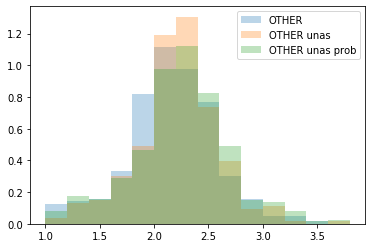

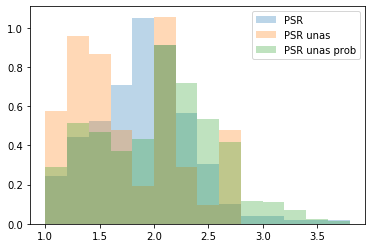

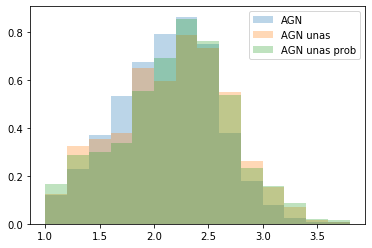

In [46]:
Eind = 1000. # Energy at which to compute the index in MeV
indE = index(Eind)

bins = np.arange(1, 4, 0.2)
for key in cats:
    pyplot.figure()
    alpha = pcat['LP_Index'][masks[key]]
    beta = pcat['LP_beta'][masks[key]]
    ln_E0 = pcat['ln(Pivot_Energy)'][masks[key]]
    vals = indE(alpha, beta, ln_E0)
    print('%s index = %.3f +- %.3f' % (key, np.mean(vals), np.std(vals)))
    pyplot.hist(vals, alpha=0.3, label=key, density=True, bins=bins)
    
    alpha = pcat['LP_Index'][masks_unas[key]]
    beta = pcat['LP_beta'][masks_unas[key]]
    ln_E0 = pcat['ln(Pivot_Energy)'][masks_unas[key]]
    vals = indE(alpha, beta, ln_E0)
    print('unas %s index = %.3f +- %.3f' % (key, np.mean(vals), np.std(vals)))
    pyplot.hist(vals, alpha=0.3, label=key + ' unas', density=True, bins=bins)
    
    alg = 'RF'
    alpha = pcat['LP_Index'][unas_mask]
    beta = pcat['LP_beta'][unas_mask]
    ln_E0 = pcat['ln(Pivot_Energy)'][unas_mask]
    vals = indE(alpha, beta, ln_E0)
    weight_key = '%s_%s' % (key, alg)
    weights = pcat[weight_key][unas_mask]
    mean = np.average(vals, weights=weights)
    print('unas prob %s index = %.3f' % (key, mean))
    pyplot.hist(vals, weights=weights, alpha=0.3, label=key + ' unas prob', density=True, bins=bins)

    pyplot.legend()

<Figure size 432x288 with 0 Axes>

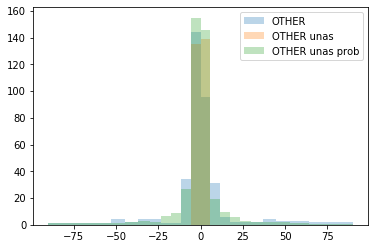

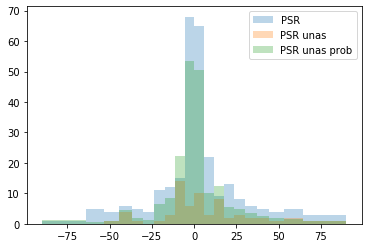

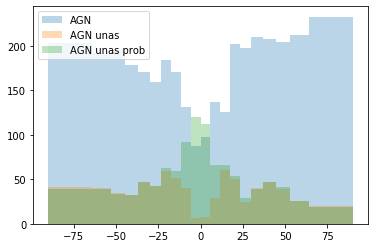

In [43]:
dens = 0
if dens:
    bins = np.arange(-90, 90.1, 5)
else:
    bins = np.rad2deg(np.arccos(np.arange(-1, 1.01, 0.1)))[::-1] - 90


#bins = np.arange(-90, 90, 5)
var_name = 'GLAT'
pyplot.figure()
for key in cats:
    pyplot.figure()
    vals = pcat[var_name][masks[key]]
    x = pyplot.hist(vals, alpha=0.3, label=key, density=dens, bins=bins)
    
    vals = pcat[var_name][masks_unas[key]]
    pyplot.hist(vals, alpha=0.3, label=key + ' unas', density=dens, bins=bins)
    
    alg = 'RF'
    weight_key = '%s_%s' % (key, alg)
    weights = pcat[weight_key][unas_mask]
    vals = pcat[var_name][unas_mask]
    y = pyplot.hist(vals, weights=weights, alpha=0.3, label=key + ' unas prob', density=dens, bins=bins)

    #pyplot.xlim(-90, 90)
    pyplot.legend()

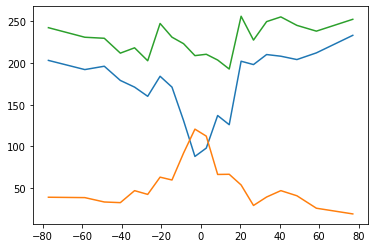

In [44]:
# density of AGNs as a function of latitude
if not dens:
    lats = (x[1][1:] + x[1][:-1]) / 2.
    pyplot.figure()
    pyplot.plot(lats, x[0])
    pyplot.plot(lats, y[0])
    pyplot.plot(lats, x[0] + y[0])

In [39]:
x[0].shape, x[1].shape

((36,), (37,))